In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

lesson_df = pd.read_excel('data_files/initial_full_stat_days.xlsx', sheet_name='competition_cols')
years = list(lesson_df['YEAR'].unique())
all_columns = list(lesson_df.columns)[1:]
gr_columns = list(lesson_df.columns)[11:]
lesson_df = lesson_df.loc[:, all_columns]

top_priority_mask = ['REGIME', 'SLEEP', 'MEDITAITON', 'BREATH', 'CTRAINING', 'MORNING', 'SPORT_TIME', 'STRENGHT_POINTS', 'OUTSIDE', 'EYES', 'QL', 'QO', 'PNW','ALW', 'WRITING', 'READING', 'LISTENING', 'SPEAK_ENG',
       'TEST_ENG', 'TOTAL_SPA', 'TOTAL_DUT', 'IQ', 'PROF', 'PRIOR', 'MEETS','DIFFICULT', 'ROUTINE', 'PAID_WORK']



In [6]:
dict_for_gr = {}
list_for_gr = []

for col in top_priority_mask:
    for year in years:
        mask = lesson_df['YEAR'] == year
        temp = lesson_df[mask]
        temp[col] = temp[col].cumsum()
        vals = temp[col].values.tolist()
        last_value = vals[-1]
        print(year, col, last_value)
        dict_for_gr[col] = vals
        list_for_gr.append(dict_for_gr)

/var/folders/k0/5mz4jdsj64n5f2jltclyq9zh0000gn/T/ipykernel_35488/3095378978.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[col] = temp2[col].cumsum()


2009 REGIME 0.0
2010 REGIME 0.0
2011 REGIME 0.0
2012 REGIME 0.0
2013 REGIME 0.0
2014 REGIME 0.0
2015 REGIME 0.0
2016 REGIME 0.0
2017 REGIME 0.0
2018 REGIME 0.0
2019 REGIME 4.5
2020 REGIME 23.5
2021 REGIME 37.5
2022 REGIME 127.0
2023 REGIME 10.5
2009 SLEEP 0.0
2010 SLEEP 0.0
2011 SLEEP 0.0
2012 SLEEP 0.0
2013 SLEEP 0.0
2014 SLEEP 1582.4833333333331
2015 SLEEP 2790.566666666668
2016 SLEEP 2841.500000000001
2017 SLEEP 998.6666666666666
2018 SLEEP 2724.0
2019 SLEEP 2652.57
2020 SLEEP 3062.7799999999993
2021 SLEEP 2896.140000000001
2022 SLEEP 2823.98
2023 SLEEP 244.40000000000006
2009 MEDITAITON 0
2010 MEDITAITON 0
2011 MEDITAITON 0
2012 MEDITAITON 0
2013 MEDITAITON 0
2014 MEDITAITON 0
2015 MEDITAITON 0
2016 MEDITAITON 0
2017 MEDITAITON 0
2018 MEDITAITON 2238
2019 MEDITAITON 1041
2020 MEDITAITON 626
2021 MEDITAITON 1007
2022 MEDITAITON 1668
2023 MEDITAITON 532
2009 BREATH 0
2010 BREATH 0
2011 BREATH 0
2012 BREATH 0
2013 BREATH 0
2014 BREATH 0
2015 BREATH 78
2016 BREATH 1985
2017 BREATH 1079

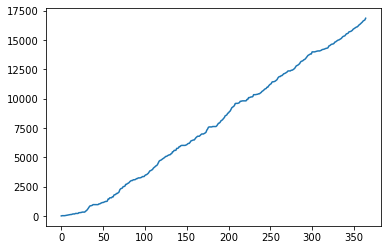

In [56]:
mask = lesson_df['YEAR'] == 2022
temp = lesson_df[mask]
temp = temp.loc[:,['YEAR', 'SPORT_TIME']].reset_index().reset_index()
temp = temp.loc[:,['level_0', 'YEAR', 'SPORT_TIME']]
temp['cumulative_sum'] = temp['SPORT_TIME'].cumsum()

x0 = temp['level_0'].values.tolist()
y0 = temp['cumulative_sum'].values.tolist()
ax = plt.plot(x0, y0)
plt.show()

In [2]:
lesson_df

,REGIME,SLEEP,MEDITAITON,BREATH,CTRAINING,MORNING,SPORT_TIME,STRENGHT_POINTS,OUTSIDE,EYES,...,TEST_ENG,TOTAL_SPA,TOTAL_DUT,IQ,PROF,PRIOR,MEETS,DIFFICULT,ROUTINE,PAID_WORK
0,0.0,0.0,0,0,0.0,0,60,0.0,60,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0.0,0,50,0.0,50,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0.0,0,0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0.0,0,50,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0.0,0,0,0.0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,0.5,6.8,15,9,0.0,1,36,555.0,39,1,...,0,0,32,0,25.0,366.0,290.0,17.0,66.0,554.0
5143,0.0,8.3,15,8,0.0,1,20,445.0,60,1,...,0,0,73,0,34.0,339.0,251.0,0.0,76.0,538.0
5144,0.5,6.3,15,8,0.0,1,61,499.4,61,1,...,0,0,51,0,0.0,457.0,59.0,73.0,86.0,221.0
5145,0.0,7.3,15,8,0.0,1,33,635.0,94,1,...,0,0,85,0,0.0,338.0,216.0,62.0,100.0,391.0
